<a href="https://colab.research.google.com/github/se3basstiann-blip/F25-MAT-1630/blob/main/MAT_1630_10_8_2025_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Bisection Method

In this notebook, we explore how to find approximate roots of equations using the **Bisection Method**, a direct application of the **Intermediate Value Theorem (IVT)**.

We will:
1. Review the **Intermediate Value Theorem**  
2. Explain the **Bisection Method** step by step  
3. Implement it in **Python**  
4. Visualize its convergence  
5. Practice with some exercises


##  The Intermediate Value Theorem (IVT)

> **Theorem (IVT):**  
> If $f(x)$ is a continuous function on the interval $[a,b]$, and if $f(a)$ and $f(b)$ have opposite signs,  
> then there exists at least one $c \in (a,b)$ such that $f(c)=0$.

In simple terms, if a continuous function goes from positive to negative (or vice versa), it must cross zero somewhere in between.

$$
f(a)\,f(b) < 0 \implies \exists \,c \in (a,b)\text{ such that }f(c)=0
$$

This is the theoretical foundation of the **Bisection Method**.




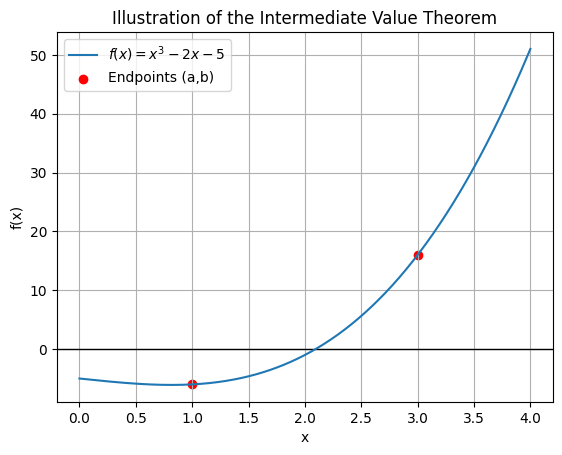

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 2*x - 5

a, b = 1, 3
x = np.linspace(a-1, b+1, 400)

plt.axhline(0, color='black', linewidth=1)
plt.plot(x, f(x), label=r"$f(x)=x^3-2x-5$")
plt.scatter([a, b], [f(a), f(b)], color='red', label='Endpoints (a,b)')
plt.title("Illustration of the Intermediate Value Theorem")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


## The Bisection Method

Suppose we have a continuous function $f(x)$ such that $f(a)\,f(b)<0$.  
Then a root must exist between $a$ and $b$.

The **algorithm** proceeds by:
1. Computing the midpoint $c = \dfrac{a+b}{2}$
2. Checking the sign of $f(c)$
3. Updating the interval:  
    - If $f(a)\,f(c)>0$, the root lies in $[c,b]$  
    - Otherwise, it lies in $[a,c]$
4. Repeating until the interval is smaller than a chosen tolerance $\varepsilon$

Each iteration **halves** the interval, giving a guaranteed convergence for continuous $f$.


In [ ]:
def bisection(a, b, f, err):
    """Return an approximate root of f in [a,b] using the Bisection Method."""
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    c = (a + b) / 2
    while (b - a) / 2 > err:
        if abs(f(c)) <= err:
            return c
        elif f(a)*f(c) > 0:
            a = c
        else:
            b = c
        c = (a + b) / 2
    return c


In [4]:
root = bisection(1, 3, f, 1e-5)
print(f"Approximate root: {root:.5f}")
print(f"f(root) = {f(root):.5e}")


NameError: name 'bisection' is not defined

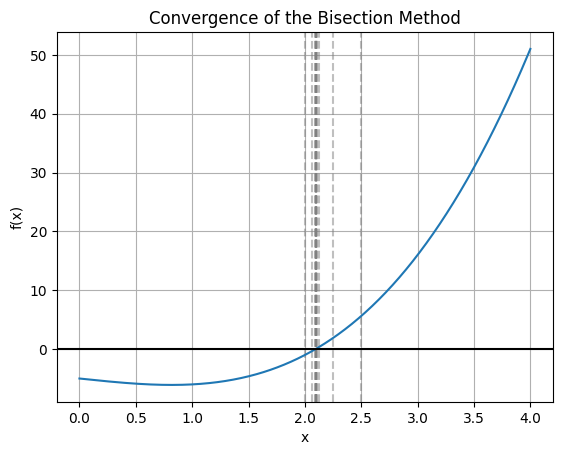

In [ ]:
def bisection_trace(a, b, f, err):
    intervals = []
    while (b - a)/2 > err:
        c = (a + b)/2
        intervals.append((a,b,c,f(c)))
        if f(a)*f(c) > 0:
            a = c
        else:
            b = c
    return intervals

intervals = bisection_trace(1, 3, f, 1e-5)
x = np.linspace(0,4,400)
for (a,b,c,_) in intervals:
    plt.axvline(c, color='gray', linestyle='--', alpha=0.5)
plt.plot(x, f(x))
plt.axhline(0, color='black')
plt.title("Convergence of the Bisection Method")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


## 🧮 Practice Exercises (Homework)

1. **Theory Check**  
  Explain why the Bisection Method always converges for a continuous function $f(x)$ satisfying $f(a)\,f(b)<0$.

2. **Implementation Task**  
  Use the Bisection Method to find a root of  
  $$f(x)=x^3-2x-5$$  
  on the interval $[1,3]$ with tolerance $10^{-4}$.

3. **Challenge Problem**  
  Modify $f(x)$ to $f(x)=\cos(x)-x$ and find the root in $[0,1]$.  
  Compare your result with the true root using `scipy.optimize.fsolve`.

4. **Plotting Practice**  
  Create a plot showing how the midpoint $c$ changes over iterations.

📝 *Submit your Colab notebook (.ipynb) in GitHub after completing all tasks.*


##  Observations

We use the fact that if $x \cdot y > 0$, then both $x$ and $y$ have the **same sign**.  
This simple property is the foundation of how we decide which subinterval to keep in the algorithm.

### Summary
The **Bisection Method**:
- is **easy to code**,  
- requires **minimal assumptions** on $f(x)$ (only continuity and a sign change), and  
- is **guaranteed to converge** if $f(a)\,f(b) < 0$.

⚠️ The **main disadvantage** is its **slow convergence rate** compared to faster methods like Newton’s Method.

---

We can also apply the Bisection Method to solve equations of the form $f(x) = k$  
by solving $g(x) = 0$ where $g(x) = f(x) - k$.


# 🧮 Exercises on the Bisection Method

### Exercise 1
Use the Bisection Method over the interval $(0, 4)$ to find an approximate solution to  
$$f(x) = 0, \quad f(x) = x^3 - 10,$$
with an error of at most $0.001$.

**Hint:** Check that $f(0)$ and $f(4)$ have opposite signs.  
**Answer (expected):** approximately $x \approx 2.154$.

---

### Exercise 2
Use the Bisection Method to find **all five** approximate solutions to
$$\ln(x) + \sin(x) = 1.5$$
on the interval $[5, 20]$.

💡 *Hint:* First define $f(x) = \ln(x) + \sin(x) - 1.5$,  
then use a graph to identify where $f(x)$ changes sign before applying the bisection function.

Expected roots (approximate): $6.20,\ 9.45,\ 12.05,\ 15.80,\ 18.05$

---

### Exercise 3
Use the Bisection Method to give an approximation of $\sqrt[3]{5}$ with an error of at most $0.01$.

**Hint:** Let $f(x) = x^3 - 5$ and find where it crosses zero on $(1,3)$.

Expected result: $x \approx 1.71$

---

### Exercise 4
Find the solution to
$$x \ln(x) = 5$$
with an error tolerance of $0.01$.

**Hint:** Let $f(x) = x \ln(x) - 5$.  
Use `math.log` or `np.log`.

Expected result: $x \approx 3.69$


In [ ]:
root = bisection(0, 3, f, 1e-5)
print(f"Approximate root: {root:.5f}")
print(f"f(root) = {f(root):.5e}")


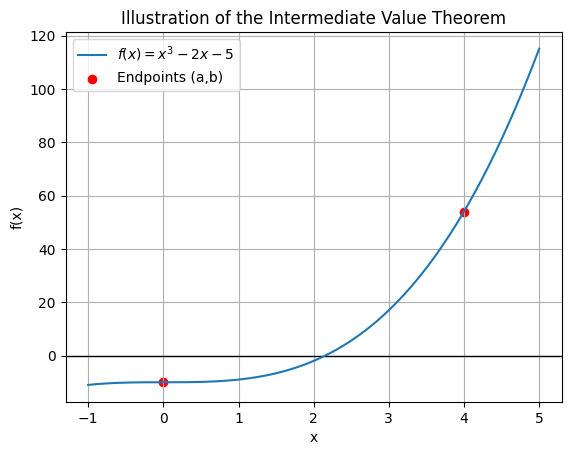

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 10

a, b = 0, 4
x = np.linspace(a-1, b+1, 400)

plt.axhline(0, color='black', linewidth=1)
plt.plot(x, f(x), label=r"$f(x)=x^3-2x-5$")
plt.scatter([a, b], [f(a), f(b)], color='red', label='Endpoints (a,b)')
plt.title("Illustration of the Intermediate Value Theorem")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
def bisection(a, b, f, err):
    """Return an approximate root of f in [a,b] using the Bisection Method."""
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    c = (a + b) / 2
    while (b - a) / 2 > err:
        if abs(f(c)) <= err:
            return c
        elif f(a)*f(c) > 0:
            a = c
        else:
            b = c
        c = (a + b) / 2
    return c

root = bisection(0, 4, f, 1e-5)
print(f"Approximate root: {root:.5f}")
print(f"f(root) = {f(root):.5e}")


Approximate root: 2.15443
f(root) = -6.76646e-06


## 📘 Homework Summary

In this section, you practiced applying the **Bisection Method** to various equations:
- Polynomial roots ($x^3 - 10 = 0$)
- Transcendental equations ($\ln(x) + \sin(x) = 1.5$)
- Cube roots and logarithmic equations ($x^3 - 5 = 0$, $x\ln(x)=5$)

Make sure your code:
1. Confirms that $f(a)\,f(b)<0$ before starting.
2. Prints both the **approximate root** and the **function value** at that root.
3. Includes **comments** or **docstrings** explaining your function and variables.

📝 *Submit your notebook after verifying that all roots make $|f(x)| < \text{tolerance}$.*
